In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
import graphviz
import missingno as msno
from scipy.stats import ttest_rel

# Pré-processamento:

Carregando dataset:

In [ ]:
import pandas as pd
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Verificando dados ausentes:

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

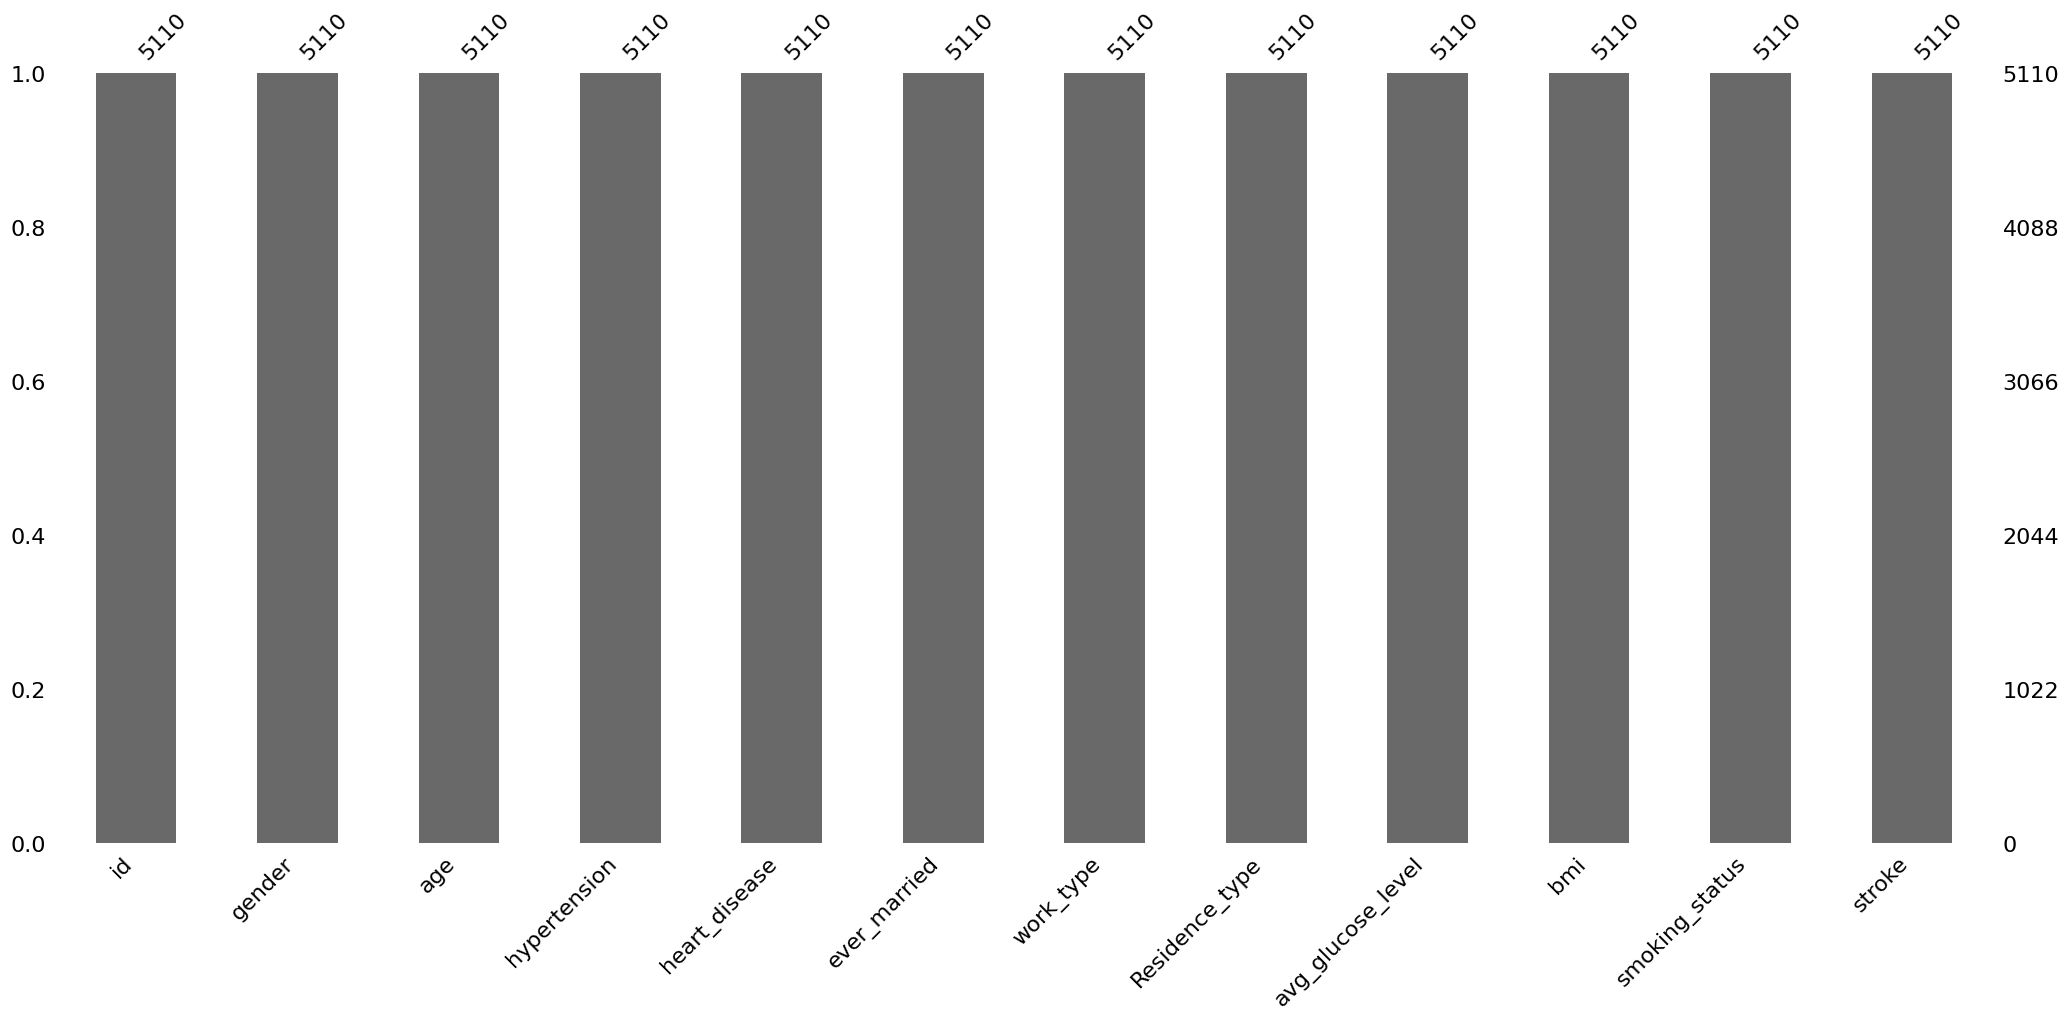

In [ ]:
msno.bar(df)

Tratando dados ausentes da coluna 'bmi' utilizando a média.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit_transform
df[['bmi']] = imputer.fit_transform(df[['bmi']])

Dataset depois de tratar valores ausentes:

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Codificando as variaveis utilizando o labelEncoder:

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df = df.apply(label_encoder.fit_transform)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,2,0
5106,0,102,0,0,1,3,1,3030,274,2,0
5107,0,56,0,0,1,3,0,1314,180,2,0
5108,1,72,0,0,1,2,0,3363,129,1,0


Gerando matriz de correlação:

*Threshold definido como 0.6*

<Axes: >

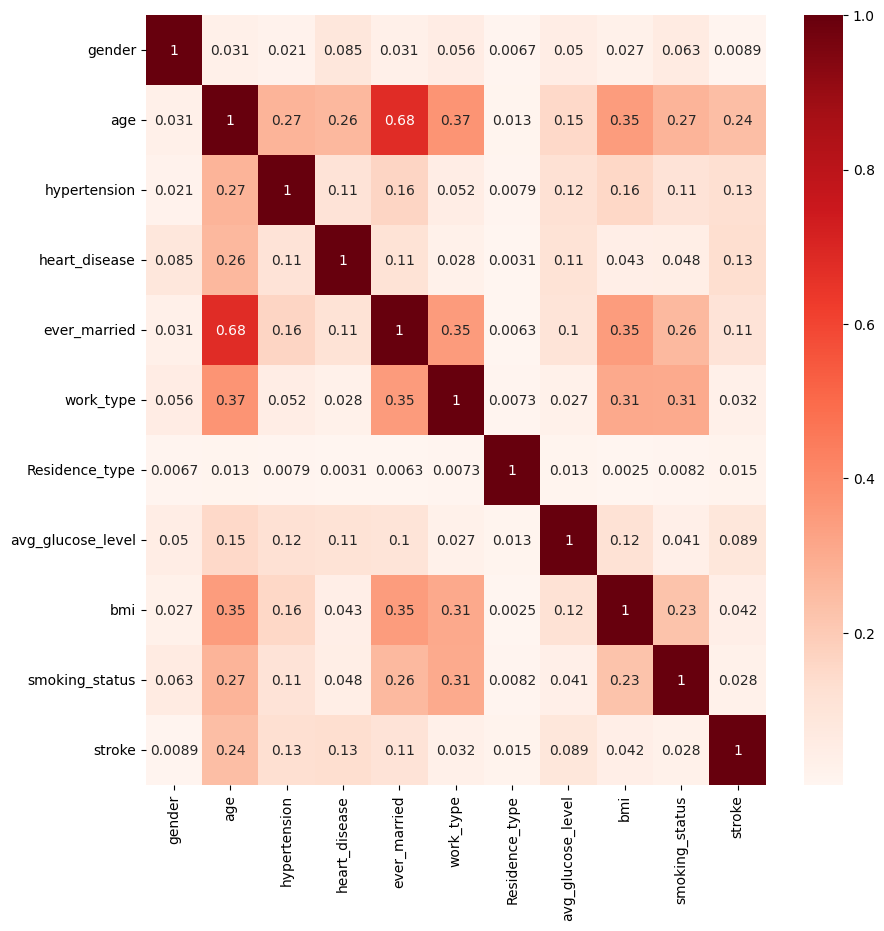

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
corr_matrix = df.corr().abs()
filtered_corr_df = corr_matrix
plt.figure(figsize=(10,10))
sn.heatmap(filtered_corr_df, annot=True, cmap="Reds")

Verificando o desbalanceamento do dataset:

<Axes: xlabel='stroke', ylabel='count'>

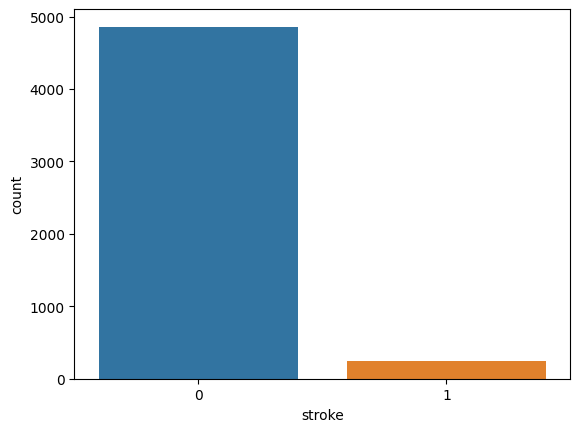

In [ ]:
np.unique(df['stroke'], return_counts=True)
sns.countplot(x = df['stroke'])

Dividindo o dataset em atributos de entrada *X* e atributos de classe *y*

In [ ]:
X = df.drop('stroke', axis=1)
y = (df['stroke'])

Realizando o train_test_split:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.3)
X_train_ind, X_test_ind, y_train_ind, y_test_ind = train_test_split(X, y,stratify=y,test_size=0.3)

Teste sem k-fold

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.combine import SMOTETomek
from scipy import stats
# X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.3)
os = SMOTETomek(sampling_strategy=0.6)
X_train_ns_ind,y_train_ns_ind=os.fit_resample(X_train_ind,y_train_ind)


# Definir os hiperparâmetros a serem otimizados para cada modelo
rf_params = { 'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],}
dt_params = { 'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],}
# rf_params = { 'criterion':  ['gini', 'entropy']}
# dt_params = { 'criterion':  ['gini', 'entropy'],}

# Criar instâncias dos modelos com os hiperparâmetros padrão
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

# Aplicar o GridSearch para cada modelo
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid_search.fit(X_train_ns_ind, y_train_ns_ind)

dt_grid_search = GridSearchCV(dt_model, dt_params, cv=5)
dt_grid_search.fit(X_train_ns_ind, y_train_ns_ind)

# Obter os melhores modelos encontrados pelo GridSearch
best_rf_model = rf_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_

# Fazer previsões com os melhores modelos
y_pred_test_rf = best_rf_model.predict(X_test_ind)
y_pred_test_dt = best_dt_model.predict(X_test_ind)

# Imprimir os relatórios de classificação
print("Random Forest:")
print(classification_report(y_test, y_pred_test_rf))

print("Decision Tree:")
print(classification_report(y_test, y_pred_test_dt))

# Imprimir os melhores parâmetros encontrados para o Random Forest
print("Melhores parâmetros Random Forest:")
print(rf_grid_search.best_params_)

# Imprimir os melhores parâmetros encontrados para a Decision Tree
print("Melhores parâmetros Decision Tree:")
print(dt_grid_search.best_params_)

Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1458
           1       0.05      0.07      0.06        75

    accuracy                           0.89      1533
   macro avg       0.50      0.50      0.50      1533
weighted avg       0.91      0.89      0.90      1533

Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1458
           1       0.04      0.09      0.06        75

    accuracy                           0.85      1533
   macro avg       0.50      0.49      0.49      1533
weighted avg       0.91      0.85      0.88      1533

Melhores parâmetros Random Forest:
{'criterion': 'gini', 'max_depth': None, 'max_features': 0.2}
Melhores parâmetros Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.6}


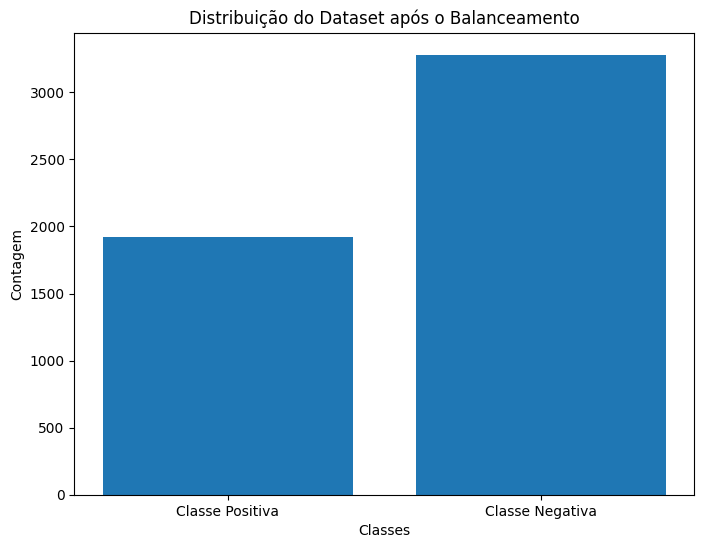

In [ ]:
import matplotlib.pyplot as plt

# Crie um DataFrame com os dados balanceados
balanced_df = pd.DataFrame(X_train_ns_ind, columns=X_train.columns)
balanced_df['target'] = y_train_ns_ind

# Conte a quantidade de amostras em cada classe
class_counts = balanced_df['target'].value_counts()

# Obtenha as classes e as contagens correspondentes
classes = ['Classe Positiva', 'Classe Negativa']
counts = [class_counts[1], class_counts[0]]  # Considerando que a classe positiva é representada pelo valor 1

# Crie um gráfico de barras para mostrar o balanceamento
plt.figure(figsize=(8, 6))
plt.bar(classes, counts)
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.title('Distribuição do Dataset após o Balanceamento')
plt.show()

# Treinando modelos e avaliando o desempenho:

Função para calcular o intervalo de confiança:

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
def interval_confidence(values):
    return stats.t.interval(confidence=0.95, df=len(values)-1, loc=np.mean(values), scale=stats.sem(values))

Função que realiza a validação cruzada K-fold e retorna o melhor modelo.

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.combine import SMOTETomek
from scipy import stats


In [ ]:

def cross(X_train, y_train, k, model):
    f1_score_superior = []
    f1_score_inferior = []
    recall_superior = []
    recall_inferior = []
    precisao_superior = []
    precisao_inferior = []
    precision_valid = [0, 0]
    recall_valid = [0, 0]
    fscore_valid = [0, 0]
    skf = KFold(n_splits=k, shuffle=True)  # Divisão em k folds estratificados
    scores = []  # Lista para armazenar as métricas de cada fold
    params = {
        'criterion':  ['gini', 'entropy'],
        'max_depth':  [None, 2, 4, 6, 8, 10],
        'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    }

    best_model = None
    best_score = 0  # Inicialização do melhor score encontrado

    for train_index, val_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]  # Dados de treino e validação do fold
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  # Rótulos de treino e validação do fold

        # balanceando nos dados de treino do fold
        os = SMOTETomek(sampling_strategy=0.6)
        X_train_resampled, y_train_resampled = os.fit_resample(X_train_fold, y_train_fold)

        # GridSearch no fold
        grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=3)
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Melhores hiperparâmetros encontrados
        best_params = grid_search.best_params_

        # Treinamento do modelo com os melhores hiperparâmetros
        model.set_params(**best_params)
        model.fit(X_train_resampled, y_train_resampled)

        # Avaliação do modelo no conjunto de validação do fold
        y_pred = model.predict(X_val_fold)
        score = model.score(X_val_fold, y_val_fold)
        scores.append(score)
        # Positivo e negativo.
        precision, recall, fscore, support = precision_recall_fscore_support(y_val_fold, y_pred, average=None)
        precision_valid = np.add(precision_valid, precision)
        recall_valid = np.add(recall_valid, recall)
        fscore_valid = np.add(fscore_valid, fscore)
        f1_score_superior.append(fscore[1])  # Corrigido
        f1_score_inferior.append(fscore[0])  # Corrigido

        recall_superior.append(recall[1])  # Corrigido
        recall_inferior.append(recall[0])  # Corrigido

        precisao_superior.append(precision[1])  # Corrigido
        precisao_inferior.append(precision[0])  # Corrigido

        # Verificar se o modelo atual é melhor que o melhor modelo anterior
        if score > best_score:
            best_score = score
            best_model = model

        # Relatório de classificação do fold
        print(f"Fold {len(scores)}:")
        print("Melhores parametros para o fold:", len(scores))
        print(best_params)
        print(classification_report(y_val_fold, y_pred))
        print("--------------------------------------------")

    # Plotar gráfico de barras para o F1 score superior e inferior
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Superior', 'Inferior'], y=[np.mean(f1_score_superior), np.mean(f1_score_inferior)])
    plt.title('F1 Score Médio')
    plt.xlabel('Classe')
    plt.ylabel('F1 Score')
    plt.show()

    # Plotar gráfico de barras para o recall superior e inferior
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Superior', 'Inferior'], y=[np.mean(recall_superior), np.mean(recall_inferior)])
    plt.title('Recall Médio')
    plt.xlabel('Classe')
    plt.ylabel('Recall')
    plt.show()

    # Plotar gráfico de barras para a precisão superior e inferior
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Superior', 'Inferior'], y=[np.mean(precisao_superior), np.mean(precisao_inferior)])
    plt.title('Precisão Média')
    plt.xlabel('Classe')
    plt.ylabel('Precisão')
    plt.show()

    # Exibição das médias e intervalos de confiança
    print("Intervalo de confiança do Fscore superior: ", interval_confidence(f1_score_superior))
    print("Intervalo de confiança do Fscore inferior: ", interval_confidence(f1_score_inferior))
    print("Intervalo de confiança do Recall superior: ", interval_confidence(recall_superior))
    print("Intervalo de confiança do Recall inferior: ", interval_confidence(recall_inferior))
    print("Intervalo de confiança da Precisao superior: ", interval_confidence(precisao_superior))
    print("Intervalo de confiança da Precisao inferior: ", interval_confidence(precisao_inferior))
    print("----------------------------------------------------------------------------------------")
    print("F1 score médio na validação das classes Inferior e Superior: ", np.round(fscore_valid / k, 2))
    print("Recall médio na validação das classes Inferior e Superior: ", np.round(recall_valid / k, 2))
    print("Precisão média na validação das classes Inferior e Superior: ", np.round(precision_valid / k, 2))

    return best_model


Instanciando modelos:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

Realizando a validação cruzada e printando o classification report do melhor modelo encontrado.

RANDOM FOREST:
Fold 1:
Melhores parametros para o fold: 1
{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2'}
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       675
           1       0.17      0.15      0.16        41

    accuracy                           0.91       716
   macro avg       0.56      0.55      0.55       716
weighted avg       0.90      0.91      0.91       716

--------------------------------------------
Fold 2:
Melhores parametros para o fold: 2
{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2'}
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       677
           1       0.12      0.15      0.14        39

    accuracy                           0.90       716
   macro avg       0.54      0.55      0.54       716
weighted avg       0.91      0.90      0.90       716

--------------------------------------------
Fold 3:
Melhores parametr

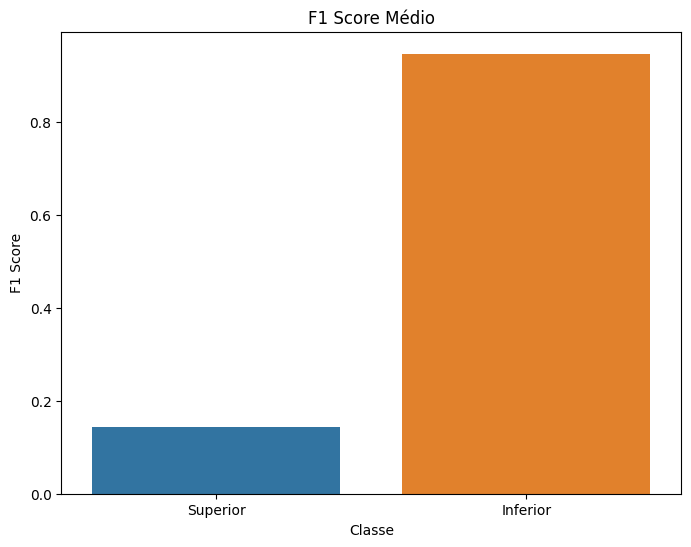

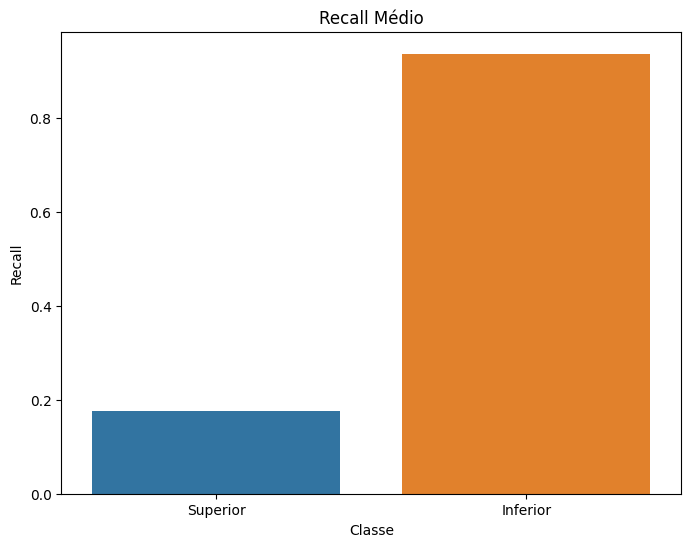

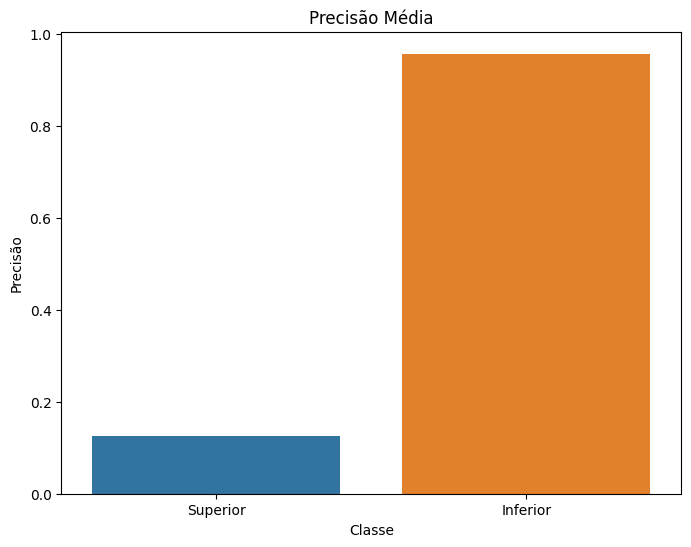

Intervalo de confiança do Fscore superior:  (0.13311662098946273, 0.1555581137758412)
Intervalo de confiança do Fscore inferior:  (0.941911768369289, 0.9520795866711309)
Intervalo de confiança do Recall superior:  (0.13919687604880712, 0.21308256776578735)
Intervalo de confiança do Recall inferior:  (0.9238039986865528, 0.9511022530126408)
Intervalo de confiança da Precisao superior:  (0.09722297119456075, 0.15558385719717327)
Intervalo de confiança da Precisao inferior:  (0.9471290251560568, 0.9665973896039325)
----------------------------------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.95 0.14]
Recall médio na validação das classes Inferior e Superior:  [0.94 0.18]
Precisão média na validação das classes Inferior e Superior:  [0.96 0.13]
Melhor   random forest: ------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1458
         

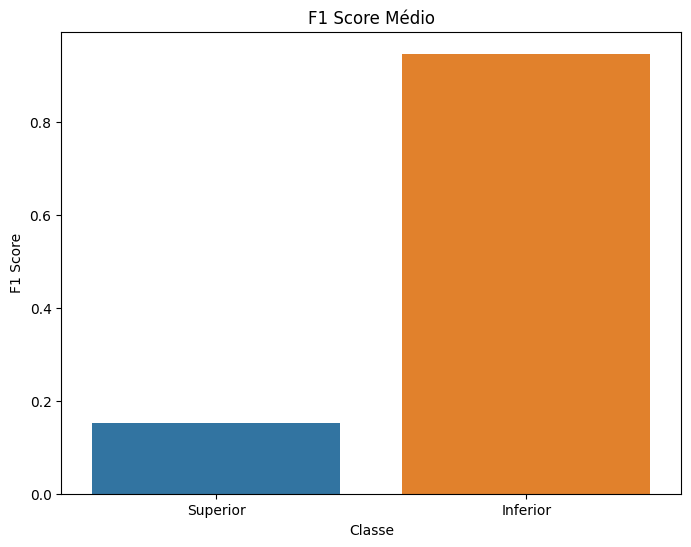

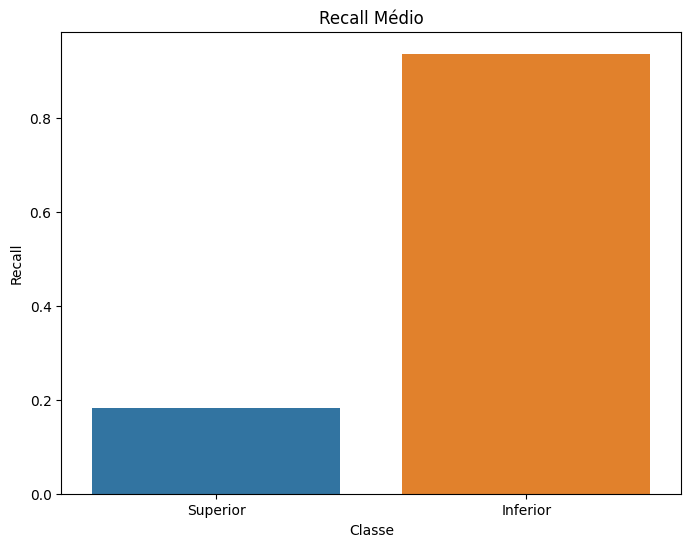

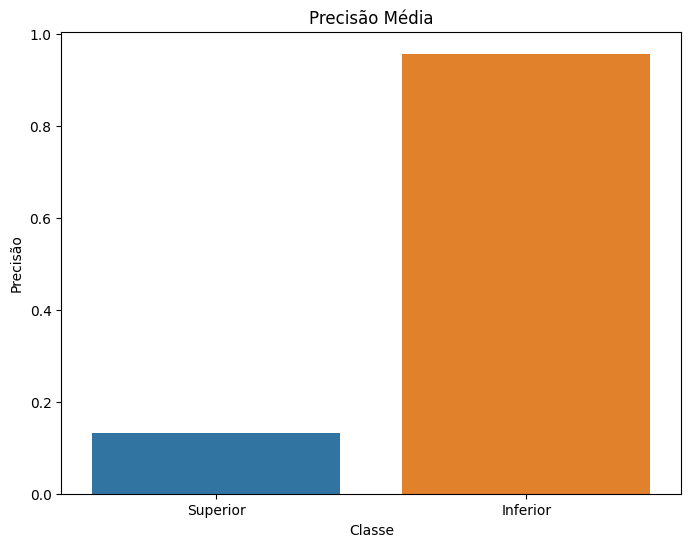

Intervalo de confiança do Fscore superior:  (0.07169721325345121, 0.23074805811022628)
Intervalo de confiança do Fscore inferior:  (0.9359632248988139, 0.9576355986204315)
Intervalo de confiança do Recall superior:  (0.0857504403601085, 0.28007773301450456)
Intervalo de confiança do Recall inferior:  (0.9206141652091737, 0.9530166123305157)
Intervalo de confiança da Precisao superior:  (0.0553218575792421, 0.2071400540316057)
Intervalo de confiança da Precisao inferior:  (0.9475608147913162, 0.9665719867319156)
----------------------------------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.95 0.15]
Recall médio na validação das classes Inferior e Superior:  [0.94 0.18]
Precisão média na validação das classes Inferior e Superior:  [0.96 0.13]
Melhor modelo Decision Tree: ------------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1458
     

In [ ]:
from sklearn.metrics import accuracy_score
print("RANDOM FOREST:")
best_model_rf = cross(X_train, y_train, 5, rf)
y_pred_test_rf = best_model_rf.predict(X_test)
print("Melhor   random forest: ------------------------------")
print(classification_report(y_test, y_pred_test_rf))

print("DECISION TREE:")
best_model_dt = cross(X_train, y_train, 5, rf)
y_pred_test_dt = best_model_dt.predict(X_test)
print("Melhor modelo Decision Tree: ------------------------------")
print(classification_report(y_test, y_pred_test_dt))

# Calculate t-test
metric_rf = accuracy_score(y_test, y_pred_test_rf)  # Replace with your desired performance metric
metric_dt = accuracy_score(y_test, y_pred_test_dt)  # Replace with your desired performance metric
n_rf = len(y_pred_test_rf)
n_dt = len(y_pred_test_dt)
std_rf = np.std([metric_rf] * n_rf)
std_dt = np.std([metric_dt] * n_dt)

t_value = (metric_rf - metric_dt) / np.sqrt((std_rf**2 / n_rf) + (std_dt**2 / n_dt))
df = n_rf + n_dt - 2  # Degrees of freedom
alpha = 0.05  # Significance level
from scipy.stats import t
# Calculate critical value for two-tailed test
critical_value = t.ppf(1 - alpha/2, df)
print("T-value:", t_value)
print("Critical value:", critical_value)
print("Precision - Random Forest:", metric_rf)
print("Precision - Decision Tree:", metric_dt)
# Compare t-value with critical value
if abs(t_value) > critical_value:
    print("There is a statistically significant difference between the models.")
else:
    print("There is no statistically significant difference between the models.")

Comparando os dois modelos em relação a o seu ROC score.

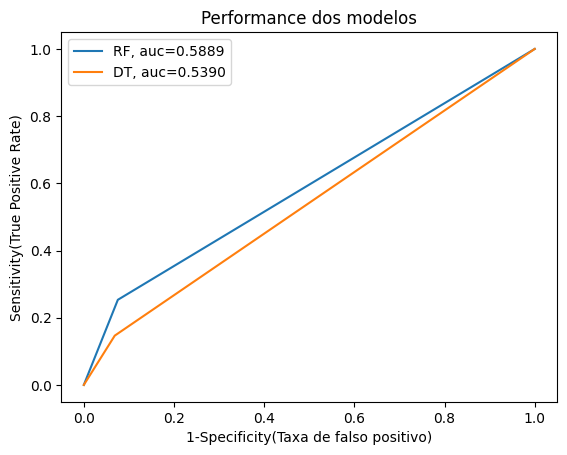

In [ ]:
from sklearn import metrics
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_test_rf)
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)
plt.plot(fpr,tpr,label="RF, auc="+str('{0:.4f}'.format(auc)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_test_dt)
auc = metrics.roc_auc_score(y_test, y_pred_test_dt)
plt.plot(fpr,tpr,label="DT, auc="+str('{0:.4f}'.format(auc)))
plt.title("Performance dos modelos")
plt.xlabel("1-Specificity(Taxa de falso positivo)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.legend(loc=0)
plt.show()

F1-Score

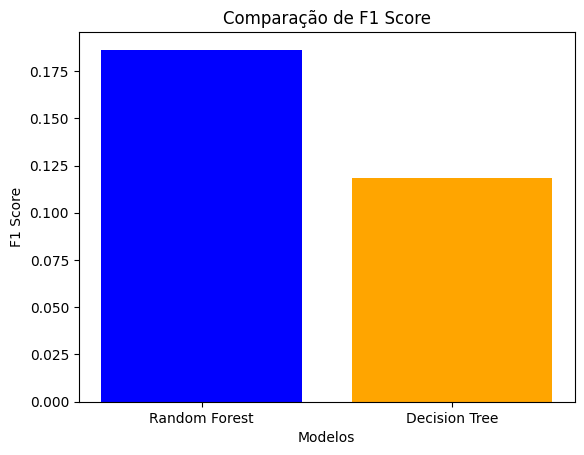

In [ ]:
f1_rf = metrics.f1_score(y_test, y_pred_test_rf)
f1_dt = metrics.f1_score(y_test, y_pred_test_dt)

models = ['Random Forest', 'Decision Tree']
f1_scores = [f1_rf, f1_dt]
colors = ['blue', 'orange']  # Cores para as barras

plt.bar(models, f1_scores, color=colors)
plt.title("Comparação de F1 Score")
plt.xlabel("Modelos")
plt.ylabel("F1 Score")
plt.show()

Precisão:

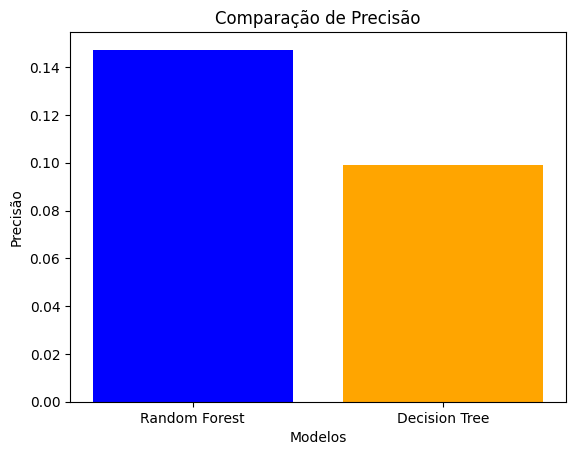

In [ ]:

precision_rf = metrics.precision_score(y_test, y_pred_test_rf)
precision_dt = metrics.precision_score(y_test, y_pred_test_dt)

models = ['Random Forest', 'Decision Tree']
precision_scores = [precision_rf, precision_dt]
colors = ['blue', 'orange']

plt.bar(models, precision_scores, color=colors)
plt.title("Comparação de Precisão")
plt.xlabel("Modelos")
plt.ylabel("Precisão")
plt.show()

Recall:

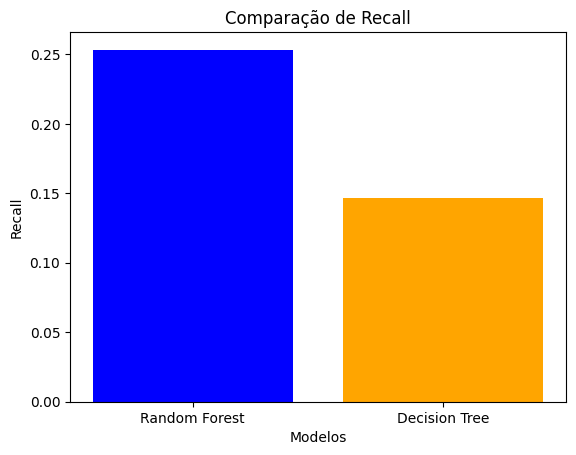

In [ ]:
# Recall
recall_rf = metrics.recall_score(y_test, y_pred_test_rf)
recall_dt = metrics.recall_score(y_test, y_pred_test_dt)

models = ['Random Forest', 'Decision Tree']
recall_scores = [recall_rf, recall_dt]
colors = ['blue', 'orange']

plt.bar(models, recall_scores, color=colors)
plt.title("Comparação de Recall")
plt.xlabel("Modelos")
plt.ylabel("Recall")
plt.show()